### Building a CNN using Keras
#### Dataset Fashion MNIST

In [1]:
import pandas as pd
import numpy as np
# Keras.models contains two api:-a.Functional b.Sequential
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


### Data Preparation

In [2]:
# Here we are using the test data as it contains less examples.
x = pd.read_csv("./Dataset/fashion-mnist.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape) #10  output classes

(10000, 784) (10000,)


In [3]:
np.unique(y,return_counts=True) #Well Balanced 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [4]:
# (X.reshape(examples,rows,colums,channel))
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y) # One hot notations 

print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


In [5]:
import matplotlib.pyplot as plt

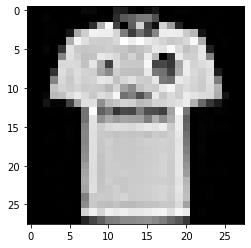

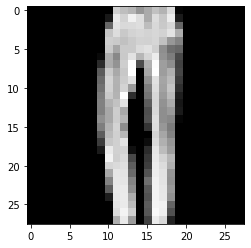

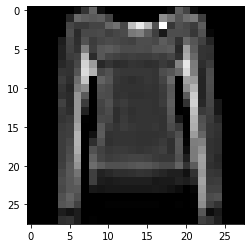

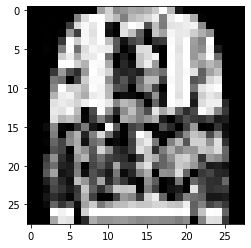

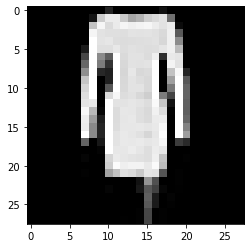

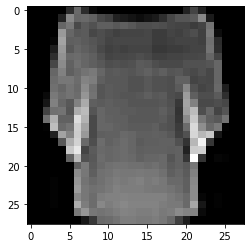

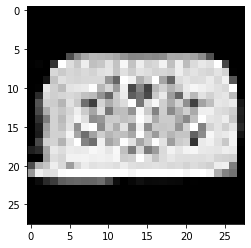

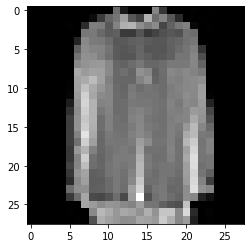

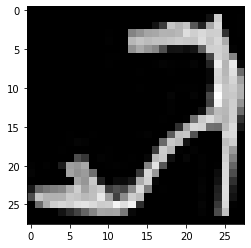

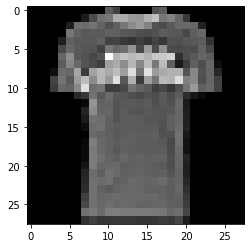

In [6]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap="gray")
    plt.show()

## CNN Model (Using Keras)

In [7]:
# Repeat the Process ->[Conv Layers--> ReLu--->Pooling]
model = Sequential()
# First Layer Of Convolution:-32 filters of size (3*3)
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
# Second Layer Of Convolution
model.add(Convolution2D(64,(3,3),activation='relu'))
# Dropout 25% of the neurons
model.add(Dropout(0.25))
# Filter size -(2*2) and stride -2
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
# Convert into a linear layer
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [8]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [9]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 11s 1ms/step - loss: 1.6451 - accuracy: 0.4137 - val_loss: 0.9252 - val_accuracy: 0.6800
Epoch 2/20
8000/8000 [==============================] - 11s 1ms/step - loss: 0.7986 - accuracy: 0.7149 - val_loss: 0.7756 - val_accuracy: 0.7355
Epoch 3/20
8000/8000 [==============================] - 11s 1ms/step - loss: 0.6956 - accuracy: 0.7421 - val_loss: 0.6831 - val_accuracy: 0.7725
Epoch 4/20
8000/8000 [==============================] - 11s 1ms/step - loss: 0.6153 - accuracy: 0.7742 - val_loss: 0.6261 - val_accuracy: 0.7755
Epoch 5/20
8000/8000 [==============================] - 12s 1ms/step - loss: 0.5718 - accuracy: 0.7904 - val_loss: 0.5954 - val_accuracy: 0.8020
Epoch 6/20
8000/8000 [==============================] - 13s 2ms/step - loss: 0.5323 - accuracy: 0.8061 - val_loss: 0.5447 - val_accuracy: 0.8055
Epoch 7/20
8000/8000 [==============================] - 13s 2ms/step - loss: 0.504

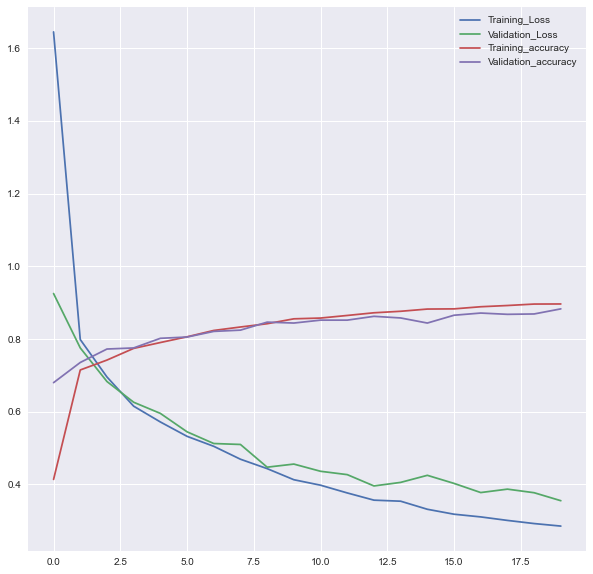

In [10]:
plt.style.use("seaborn")
plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'],label="Training_Loss")
plt.plot(hist.history['val_loss'],label="Validation_Loss")

plt.plot(hist.history['accuracy'],label="Training_accuracy")
plt.plot(hist.history['val_accuracy'],label="Validation_accuracy")
plt.legend()
plt.show()


In [11]:
model.evaluate(X_train,Y_train)[1]

10000/10000 [==============================] - 3s 288us/step


0.9046000242233276

In [12]:
model.predict(X_train)

array([[9.5075452e-01, 1.2015173e-05, 1.5014892e-04, ..., 5.4691390e-11,
        1.0556072e-05, 7.7993782e-08],
       [2.9696459e-06, 9.9991047e-01, 7.7224676e-08, ..., 1.8078254e-12,
        3.7833709e-07, 5.1652875e-14],
       [1.3649285e-02, 1.1285553e-05, 9.0090185e-01, ..., 5.6858291e-09,
        3.0863361e-05, 3.2460309e-07],
       ...,
       [2.3095020e-04, 1.5473562e-06, 1.1994824e-04, ..., 3.1336103e-04,
        9.9854362e-01, 1.8019615e-05],
       [5.4408357e-02, 4.9322040e-04, 2.4438178e-02, ..., 5.5004351e-05,
        6.4647877e-01, 1.7957335e-02],
       [6.1467987e-02, 2.9747099e-01, 7.2557241e-02, ..., 2.9543074e-07,
        1.0251904e-02, 2.9797513e-05]], dtype=float32)